In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the dataset with a specified encoding
file_path = 'IMDb Movies India.csv'

# Try common encodings
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')  # Fallback to latin1 if utf-8 fails

# Display the first few rows
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Dataset Shape: (15509, 10)

Columns: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Data Types:
 Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


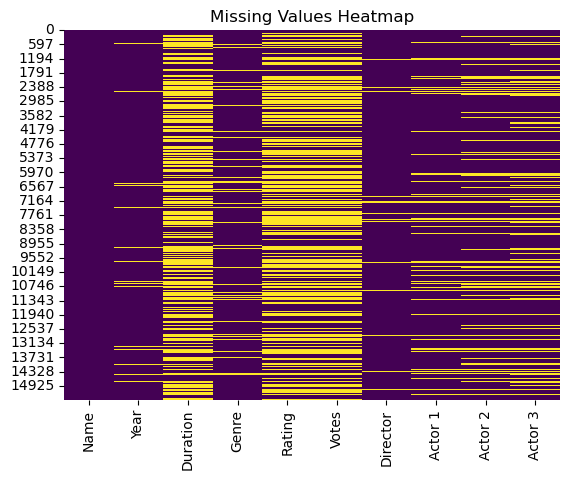

In [5]:
# Dataset overview
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

# Descriptive statistics
data.describe()

# Plot some initial visualizations
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')  # Missing values heatmap
plt.title('Missing Values Heatmap')
plt.show()


In [9]:
# Display the column names
print(data.columns)
# Drop unnecessary columns (replace with actual column names)
data = data.drop(columns=['UnwantedColumn1', 'UnwantedColumn2'], errors='ignore')

# Handle missing values for a specific column
if 'rating' in data.columns:
    data['rating'] = data['rating'].fillna(data['rating'].median())



Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [15]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le


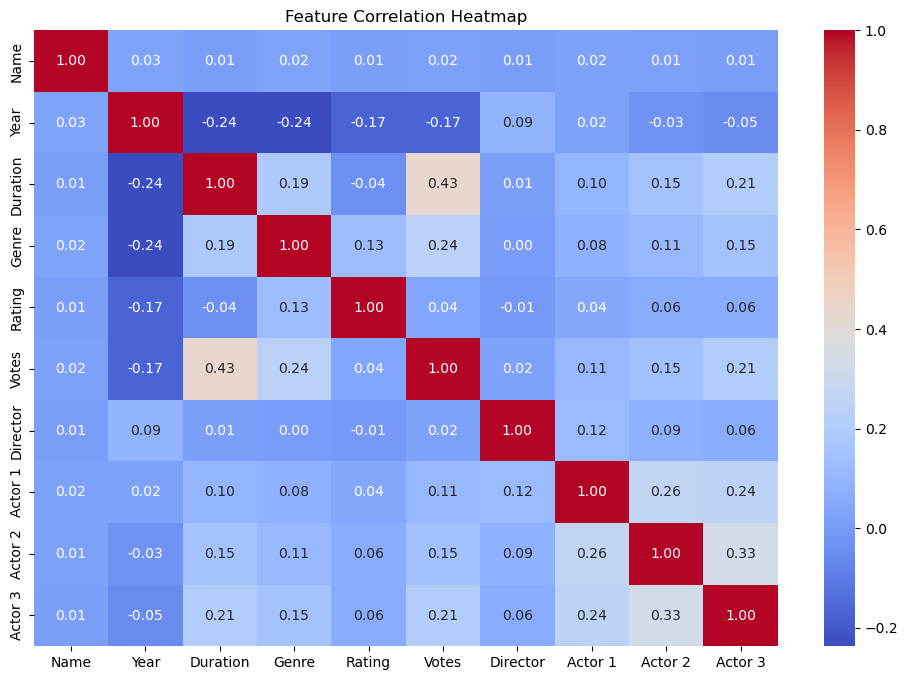

In [16]:
# Correlation analysis on numeric data
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [20]:
# Define target and features
if 'Rating' not in data.columns:
    raise KeyError("The 'Rating' column is not in the dataset. Check column names.")

# Ensure target is numeric
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data = data.dropna(subset=['Rating'])  # Drop rows where target is NaN

X = data.drop(columns=['Rating'])  # Features
y = data['Rating']

# Select only numeric columns for features
X = X.select_dtypes(include=[np.number])

# Check final data shapes
print("Feature dataset shape:", X.shape)
print("Target dataset shape:", y.shape)


Feature dataset shape: (7919, 9)
Target dataset shape: (7919,)


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (6335, 9)
Test set size: (1584, 9)


In [22]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 1.44
R-squared (R2): 0.23


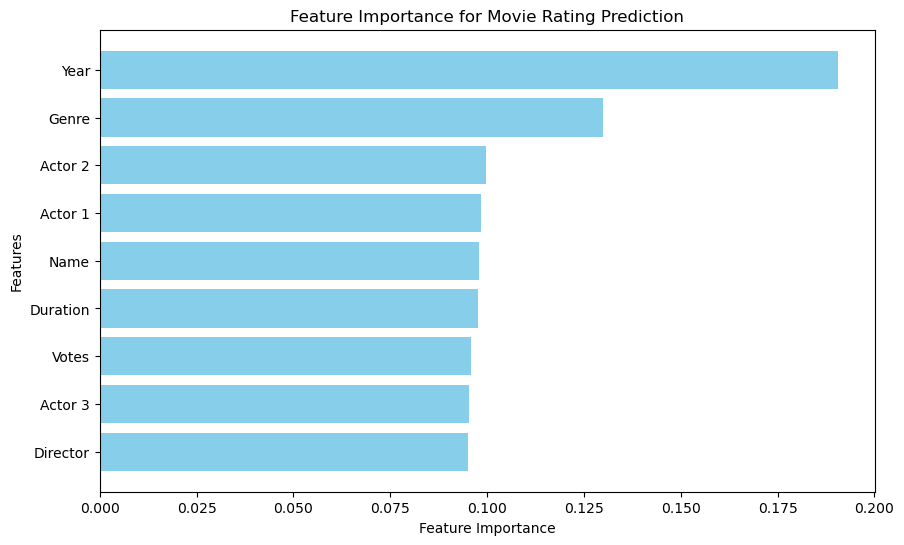

In [24]:
# Plot feature importance
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Movie Rating Prediction')
plt.show()
